In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='DengXian')

# 加载数据集
def load_csv():
    data = pd.read_csv("iris.csv")
    print(data.head(5))
    return data

data = load_csv()
data.info()

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


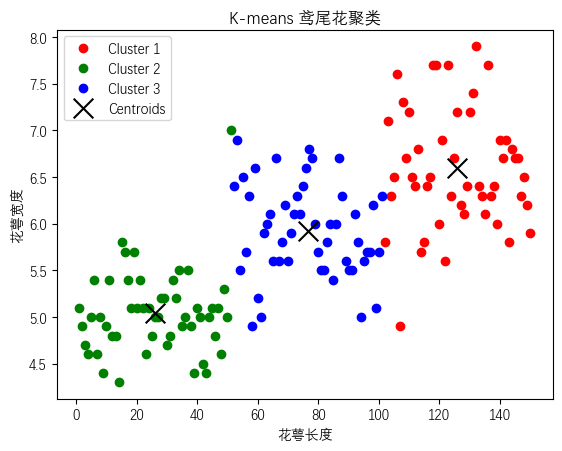

In [8]:
# 定义K-means算法
def kmeans(X, k, max_iters=100):
    # 随机初始化聚类中心
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # 计算每个样本到各个聚类中心的距离
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        # 分配每个样本到最近的聚类中心
        labels = np.argmin(distances, axis=0)
        # 更新聚类中心
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # 如果聚类中心没有变化，则停止迭代
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels


k = 3
X = data.iloc[:, :-1].values

centroids, labels = kmeans(X, k)


# 可视化聚类结果
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')
plt.title('K-means 鸢尾花聚类')
plt.legend()
plt.show()